## Step 1: Installing & Importing Necessary Libraries

In this step, we import all the essential libraries needed for image processing:

- **OpenCV (`cv2`)** – Used for reading, processing, and manipulating images.
- **NumPy** – Used for handling image data as arrays.
- **Matplotlib** – Used to plot and display images in the notebook.
- **Scikit-learn (`sklearn`)** – Provides the KMeans clustering algorithm for reducing the number of image colors.


In [6]:
!pip install opencv-python

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Step 1: Load and Show the Original Image

In this step, we load the original image using OpenCV and display it using Matplotlib.

OpenCV (`cv2.imshow`) shows images in **BGR format** (Blue-Green-Red),  
while Matplotlib expects images in **RGB format** (Red-Green-Blue).  

So, we convert the image from BGR to RGB before displaying it.  
Both the original and converted images are shown for comparison.


Text(0.5, 1.0, '                        Converted Image as RGB Format')

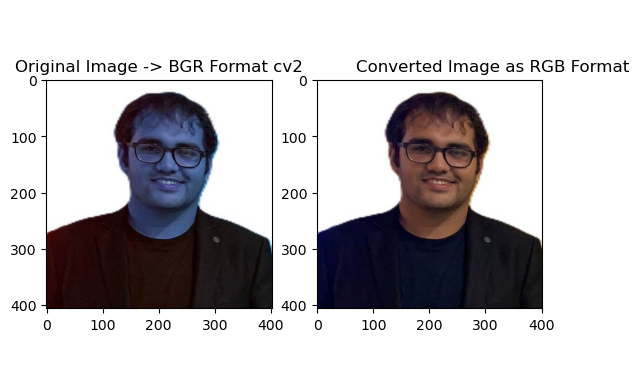

In [13]:
img= cv2.imread("therock.jpg")
plt.axis("off")
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image -> BGR Format cv2")
plt.subplot(1,2,2)
img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title("                        Converted Image as RGB Format")

## 🧠 Understanding Edge Detection & Thresholding in Image Processing

### 🔍 What are Edges?
Edges represent **sudden changes in intensity** (brightness or color) within a small region of an image.  
They help highlight the **boundaries of objects** and are essential for detecting shapes and outlines.

📹 Video explanation: [What are Edges in Images?](https://www.youtube.com/watch?v=zCcj8onPrOE)

---

### ✨ Median Blurring
Median blurring is used to **smooth an image** while preserving edges.  
It removes small noise by replacing each pixel’s value with the **median value of neighboring pixels**.

This step is often used **before edge detection** to make the edges more accurate and less noisy.

---

### 🧾 Thresholding: Segmenting the Image
Thresholding is the **simplest way to segment** an image based on pixel intensity (brightness).

#### 🔲 Binary Thresholding
- If pixel value ≥ threshold → set to 1 (white)
- Else → set to 0 (black)

#### 🔁 Binary Inverse Thresholding
- If pixel value ≥ threshold → set to 0 (black)
- Else → set to 1 (white)

#### ✂️ Truncate Threshold
- If pixel value ≥ threshold → set to threshold
- Else → keep pixel value as is

#### ➖ Threshold to Zero
- If pixel value ≥ threshold → keep pixel value
- Else → set to 0

---

### 🌍 Types of Thresholding

#### 1. **Global Thresholding**
A **single threshold value** is used across the whole image.

#### 2. **Adaptive Thresholding**
The image is divided into **small regions**, and a **different threshold is calculated for each region**.

Two types of adaptive thresholding:
- **Mean**: Takes the average of the surrounding pixels.
- **Gaussian**: Takes a weighted average, giving more importance to nearby pixels.

🎥 Tutorial series: [Image Thresholding](https://www.youtube.com/watch?v=l1dhyw-EjSw&list=PLTXuqKbKkxkTy764PhX1yil5hj-5va099&index=27)


## Step 2: Detect Edges using Edge Detection

We find the outlines in the image using edge detection techniques.

These edges will act like black lines in a cartoon drawing.

- First, we convert the image to grayscale.
- Then, we apply median blur to reduce noise.
- Finally, adaptive thresholding is used to highlight the edges.


In [17]:
def edge_detector(img1, line_size, blur_value):
    gray_img= cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray_img1 = cv2.medianBlur(gray_img, blur_value)
    edge1= cv2.adaptiveThreshold(gray_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)                                
    edge2 = cv2.adaptiveThreshold(gray_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, line_size, blur_value)
    edge= {'edge1': edge1,
          'edge2': edge2}
    return edge

Text(0.5, 1.0, 'Thresh Binary Inverse')

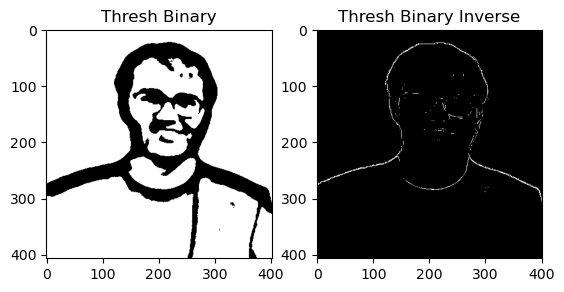

In [44]:
edge= edge_detector(img1, 51, 7)
plt.subplot(1,2,1)
plt.imshow(edge['edge1'], cmap= 'gray')
plt.title("Thresh Binary")

edge= edge_detector(img1, 3, 7)
plt.subplot(1,2,2)
plt.imshow(edge['edge2'], cmap= 'gray')
plt.title("Thresh Binary Inverse")

For Future Exploration. Now apply through canny edge detection for edges
https://www.youtube.com/watch?v=zCcj8onPrOE

## 🎯 Goal of K-Means Clustering in Image Processing

### 🤖 What is K-Means Clustering?
K-Means is a machine learning algorithm that **groups similar data points into clusters**.

- **Similar points** (close together) are grouped in the same cluster.
- **Farther points** are placed in different clusters.
- Each cluster is represented by a **centroid** – the “center” of that cluster.

> 💡 Centroids are **not real data points**, but calculated as the average position of all points in that cluster.

---

### 🎨 Why Use K-Means in Image Processing?

In image processing or computer vision, **pixels are grouped based on their color values**.  
This helps simplify the image while preserving the essential features.

---

### 🔍 Benefits of Clustering Pixel Colors

1. **Preprocessing for Algorithms**  
   Instead of working with high-detail photo-realistic images, we reduce the image to a **simplified version**.  
   This can help other algorithms (like object detection) work faster and more accurately.

2. **Compression**  
   Reducing the number of unique colors (e.g., from millions to just 5–50 clusters) means:
   - Smaller file sizes (KB instead of MB)
   - Faster processing and loading
   - Still retains recognizable features

3. **Stylized Image Representations**  
   K-Means gives us a **basic outline or cartoonish version** of the image, where only the most **distinct color features** remain visible.

---

🖼️ Example:  
An original photo may contain thousands of color variations.  
After applying K-Means with `k=7`, the same image now uses only 7 dominant colors —  
**simplified, stylized, and easier to analyze.**


## Step 3: Simplify Colors using KMeans Clustering

KMeans is used to reduce the number of colors in the image.  
This makes the image look more cartoon-like and flat, just like in comic books.

- We reshape the image into a 2D array of pixels.
- KMeans groups similar colors together into `k` clusters.
- Each pixel is replaced with the color of its cluster center.


In [49]:
k= 7
data= img1.reshape(-1,3)

kmeans= KMeans(n_clusters=k,random_state=42).fit(data)
img_reduced= kmeans.cluster_centers_[kmeans.labels_]

img_reduced= img_reduced.reshape(img.shape)

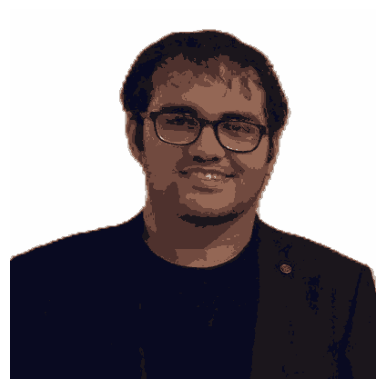

In [51]:
img_reduced= img_reduced.astype(np.uint8)
plt.axis("off")
plt.imshow(img_reduced)

## Step 4: Smooth Colors using Bilateral Filter

We apply a bilateral filter to smooth the image **without removing edges**.

- This filter blurs similar colors together.
- But it **keeps edges sharp**, unlike normal blurring filters.
- It helps give the image a painting or cartoon feel.


In [54]:
blurred= cv2.bilateralFilter(img_reduced, d=3, sigmaColor=200, sigmaSpace=200)

## Step 5: Combine Smooth Colors and Edges

Now we mix the smooth color image (from Step 2) with the edge mask (from Step 4).

- We use `cv2.bitwise_and()` to keep only the color regions where there are edges.
- The result looks like a cartoon image: smooth flat areas + bold outlines.


In [57]:
cartoon= cv2.bitwise_and(blurred, blurred, mask=edge["edge1"])

## Final Output: Cartoon Image

We show the original image and the final cartoonified image side by side  
to clearly see the transformation.


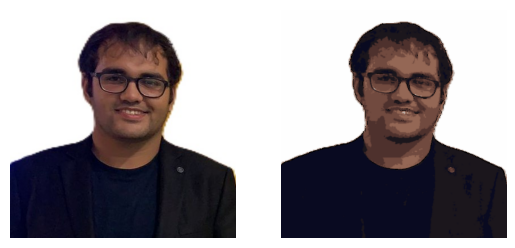

In [60]:
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img1)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cartoon)

## Saving Output: Cartoon Image


True

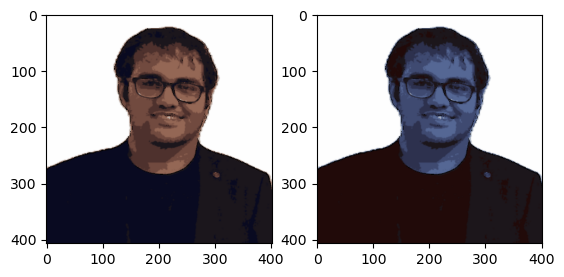

In [63]:
plt.subplot(1,2,1)
plt.imshow(cartoon)
cv2.imwrite('cartoon.png', cartoon)

plt.subplot(1,2,2)
cartoon_= cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
plt.imshow(cartoon_)
cv2.imwrite('cartoon_.png', cartoon_)